<a href="https://colab.research.google.com/github/fabiodr/colabs/blob/main/colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install diffusers==0.20.2 transformers==4.29.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 989.1/989.1 kB 10.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 27.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 38.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 45.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 81.4 MB/s eta 0:00:00
  Created wheel for diffusers: filename=diffusers-0.20.2-py3-none-any.whl size=1342633 sha256=2f3a6e4885f0c4043245ad68bccad3b17e4897cbbbb44c8295a9e897e2785d02
  Stored in directory: /root/.cache/pip/wheels/dc/8b/d9/34f7a1936109e05e9bba0cc2241a6f8cd89e25959dc7aae942
Successfully built diffusers


In [ ]:
import torch
import requests
from PIL import Image
from diffusers import DiffusionPipeline, EulerAncestralDiscreteScheduler

# Load the pipeline
pipeline = DiffusionPipeline.from_pretrained(
    "sudo-ai/zero123plus-v1.1", custom_pipeline="sudo-ai/zero123plus-pipeline",
    torch_dtype=torch.float16
)

# Feel free to tune the scheduler!
# `timestep_spacing` parameter is not supported in older versions of `diffusers`
# so there may be performance degradations
# We recommend using `diffusers==0.20.2`
pipeline.scheduler = EulerAncestralDiscreteScheduler.from_config(
    pipeline.scheduler.config, timestep_spacing='trailing'
)
pipeline.to('cuda:0')

# Download an example image.
cond = Image.open(requests.get("https://d.skis.ltd/nrp/sample-data/lysol.png", stream=True).raw)

# Run the pipeline!
result = pipeline(cond, num_inference_steps=28).images[0]
# for general real and synthetic images of general objects
# usually it is enough to have around 28 inference steps
# for images with delicate details like faces (real or anime)
# you may need 75-100 steps for the details to construct

result.show()
result.save("output.png")

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

(…)3plus-v1.1/resolve/main/model_index.json:   0%|          | 0.00/2.57k [00:00<?, ?B/s]

(…)23plus-pipeline/resolve/main/pipeline.py:   0%|          | 0.00/15.5k [00:00<?, ?B/s]

unet/diffusion_pytorch_model.safetensors not found


Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

(…)e_extractor_vae/preprocessor_config.json:   0%|          | 0.00/369 [00:00<?, ?B/s]

(…)1a4e9a920d7020e2654/tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

(…)020e2654/scheduler/scheduler_config.json:   0%|          | 0.00/357 [00:00<?, ?B/s]

(…)9a920d7020e2654/text_encoder/config.json:   0%|          | 0.00/714 [00:00<?, ?B/s]

(…)_extractor_clip/preprocessor_config.json:   0%|          | 0.00/466 [00:00<?, ?B/s]

(…)0e2654/tokenizer/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

(…)1a4e9a920d7020e2654/tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

(…)020e2654/tokenizer/tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

(…)80b2e1a4e9a920d7020e2654/vae/config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

(…)920d7020e2654/vision_encoder/config.json:   0%|          | 0.00/579 [00:00<?, ?B/s]

(…)0b2e1a4e9a920d7020e2654/unet/config.json:   0%|          | 0.00/1.76k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/681M [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/1.73G [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/167M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.26G [00:00<?, ?B/s]

Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.


Loading pipeline components...:   0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

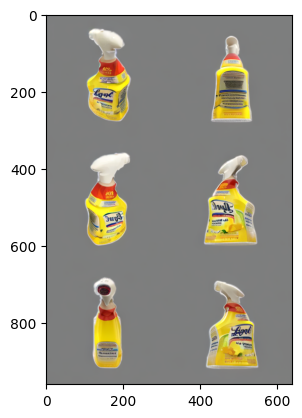

In [ ]:
import matplotlib.pyplot as plotlib

plotlib.imshow(plotlib.imread('output.png'))
